In [37]:
import numpy as np
import xarray as xr
import datetime as dt
import matplotlib.pyplot as plt
import cartopy, cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import matplotlib.gridspec as gridspec
import osgeo

ModuleNotFoundError: No module named 'osgeo'

In [2]:
glm_filename = "/home/adriano/eda-goes16/data/noaa-goes16/GLM-L2-LCFA/2020/227/00/OR_GLM-L2-LCFA_G16_s20202270000000_e20202270000200_c20202270000224.nc"
abi_filename = "/home/adriano/eda-goes16/data/noaa-goes16/ABI-L2-CMIPF/2020/227/00/OR_ABI-L2-CMIPF-M6C13_G16_s20202270000200_e20202270009520_c20202270009593.nc"

In [3]:
glm_nc = xr.open_dataset(glm_filename)
glm_nc

<xarray.Dataset>
Dimensions:                                 (number_of_events: 17225, number_of_groups: 6312, number_of_flashes: 369, number_of_time_bounds: 2, number_of_wavelength_bounds: 2, number_of_field_of_view_bounds: 2)
Coordinates: (12/21)
    event_id                                (number_of_events) uint32 ...
    event_time_offset                       (number_of_events) datetime64[ns] ...
    event_lat                               (number_of_events) float32 ...
    event_lon                               (number_of_events) float32 ...
    event_parent_group_id                   (number_of_events) uint32 ...
    group_id                                (number_of_groups) uint32 ...
    ...                                      ...
    product_time                            datetime64[ns] ...
    lightning_wavelength                    float32 ...
    group_time_threshold                    float32 ...
    flash_time_threshold                    float32 ...
    lat_field_of_view                       float32 ...
    lon_field_of_view                       float32 ...
Dimensions without coordinates: number_of_events, number_of_groups, number_of_flashes, number_of_time_bounds, number_of_wavelength_bounds, number_of_field_of_view_bounds
Data variables: (12/27)
    event_energy                            (number_of_events) float32 ...
    group_frame_time_offset                 (number_of_groups) datetime64[ns] ...
    group_area                              (number_of_groups) float32 ...
    group_energy                            (number_of_groups) float32 ...
    group_quality_flag                      (number_of_groups) float32 ...
    flash_frame_time_offset_of_first_event  (number_of_flashes) datetime64[ns] ...
    ...                                      ...
    nominal_satellite_subpoint_lon          float32 ...
    lon_field_of_view_bounds                (number_of_field_of_view_bounds) float32 ...
    percent_uncorrectable_L0_errors         float32 ...
    algorithm_dynamic_input_data_container  int32 ...
    processing_parm_version_container       int32 ...
    algorithm_product_version_container     int32 ...
Attributes: (12/29)
    production_site:           RBU
    featureType:               point
    dataset_name:              OR_GLM-L2-LCFA_G16_s20202270000000_e2020227000...
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    institution:               DOC/NOAA/NESDIS> U.S. Department of Commerce, ...
    ...                        ...
    time_coverage_start:       2020-08-14T00:00:00.0Z
    time_coverage_end:         2020-08-14T00:00:20.0Z
    production_data_source:    Realtime
    production_environment:    OE
    LUT_Filenames:             GLM_CALINR_AllFilters(FM1E_CDRL79RevK_PR_09_00...
    id:                        86edf611-8f2b-4ad9-b2a3-955eb5d26b59

In [4]:
event_lon = glm_nc['event_lon'].values
event_lat = glm_nc['event_lat'].values

group_lon = glm_nc['group_lon'].values
group_lat = glm_nc['group_lat'].values

flash_lon = glm_nc['flash_lon'].values
flash_lat = glm_nc['flash_lat'].values

In [5]:
abi_nc = xr.open_dataset(abi_filename)
abi_nc

<xarray.Dataset>
Dimensions:                                           (y: 5424, x: 5424, number_of_time_bounds: 2, number_of_image_bounds: 2, band: 1)
Coordinates:
    t                                                 datetime64[ns] ...
  * y                                                 (y) float32 0.1518 ... ...
  * x                                                 (x) float32 -0.1518 ......
    y_image                                           float32 ...
    x_image                                           float32 ...
    band_wavelength                                   (band) float32 ...
    band_id                                           (band) int32 ...
Dimensions without coordinates: number_of_time_bounds, number_of_image_bounds, band
Data variables: (12/33)
    CMI                                               (y, x) float32 ...
    DQF                                               (y, x) float32 ...
    time_bounds                                       (number_of_time_bounds) datetime64[ns] ...
    goes_imager_projection                            int32 ...
    y_image_bounds                                    (number_of_image_bounds) float32 ...
    x_image_bounds                                    (number_of_image_bounds) float32 ...
    ...                                                ...
    esun                                              float32 ...
    kappa0                                            float32 ...
    focal_plane_temperature_threshold_exceeded_count  float64 ...
    maximum_focal_plane_temperature                   float32 ...
    focal_plane_temperature_threshold_increasing      float32 ...
    focal_plane_temperature_threshold_decreasing      float32 ...
Attributes: (12/29)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    cdm_data_type:             Image
    time_coverage_start:       2020-08-14T00:00:20.0Z
    time_coverage_end:         2020-08-14T00:09:52.0Z
    timeline_id:               ABI Mode 6
    production_data_source:    Realtime
    id:                        468e88b3-6ce7-47ae-81e6-b177377949f9

In [36]:
data_celsius = abi_nc['CMI'].values-273.15
date = (dt.datetime.strptime(abi_nc.time_coverage_start, '%Y-%m-%dT%H:%M:%S.%fZ'))
satellite_height = abi_nc['nominal_satellite_height'].values.max()*1000
channel = abi_nc['band_id'].values[0]

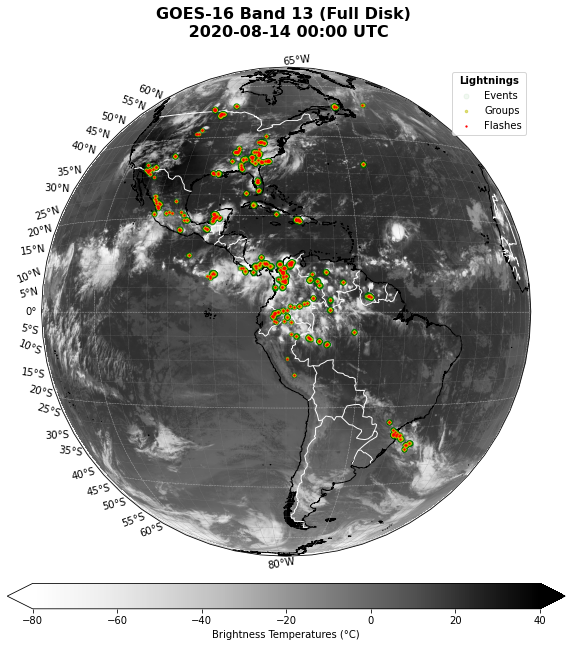

In [23]:
projection = ccrs.Geostationary(central_longitude=-75.0, satellite_height=satellite_height)
bound_box = (-5434894.67527,5434894.67527,-5434894.67527,5434894.67527)

fig, ax = plt.subplots(1, 1, figsize=(10, 10), subplot_kw={'projection': projection})

ax.set_title(f"GOES-16 Band {channel} (Full Disk) \n {date.strftime('%Y-%m-%d %H:%M')} UTC", 
             fontweight='bold', fontsize=16, y=1.05)

img = ax.imshow(data_celsius, vmin=-80, vmax=40, origin='upper', extent=bound_box, cmap='Greys')
ax.coastlines(resolution='10m', color='k', linewidth=1)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white', linewidth=1)
ax.gridlines(color='white', alpha=0.5, linestyle='--', linewidth=0.5)

ax.plot(event_lon, event_lat, '.g', markersize=10, alpha=0.05, transform=ccrs.PlateCarree(), label='Events')
ax.plot(group_lon, group_lat, '.y', markersize=5, alpha=0.5, transform=ccrs.PlateCarree(), label='Groups')
ax.plot(flash_lon, flash_lat, '.r', markersize=2.5, alpha=1, transform=ccrs.PlateCarree(), label='Flashes')




gl = ax.gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', 
                  linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), 
                  draw_labels=True)
gl.top_labels = False
gl.right_labels = False
l = plt.legend()
l.set_title(title='Lightnings', prop={'weight': 'bold'})
plt.colorbar(img, label='Brightness Temperatures (°C)', extend='both', orientation='horizontal', pad=0.05, fraction=0.05)